In [50]:
# setup matplotlib to plot inline  
import matplotlib

#import the pyplot module of matplotlib as plt
import matplotlib.pyplot as plt

#import pandas under the abbreviation 'pd'
import pandas as pd

#import nampy under the abbreviation 'np'
import numpy as np

In [51]:
import os
print(os.listdir(r"C:\Users\dell\Desktop\ine 2\S4\machine learning"))

#import the hrart disease dataset and save it to a variable
#using pandas and read_csv()
heart_disease = pd.read_csv("heart-disease.csv")

#check the first 5 rows of the data
heart_disease.head()

['.ipynb_checkpoints', '1.jpg', 'car-sales-missing-data.csv', 'finalized_model.sav', 'heart-disease.csv', 'PerformanceMetrics.pdf', 'suplearnI.pdf', 'suplearnII.pdf', 'TP1 (2).rar', 'TP1 - Supervised Learning.pdf', 'Untitled.ipynb', 'Untitled1.ipynb']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
#create X (all columns except target)
X = heart_disease.loc[:, heart_disease.columns != 'target']

#create y (only the target column)
y = heart_disease[["target"]]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [53]:
#import train_test_split from sklearn's model_selectionmodule
from sklearn.model_selection import train_test_split

#use train_test_split X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [54]:
#view the different shapes of the training and test datasets

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(91, 13)
(212, 13)
(91, 1)
(212, 1)


In [55]:
#import the RandomForestClassifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

#instantiate an instance of RandomForestClassifier as clf
clf = RandomForestClassifier(100)

In [56]:
#fit the RandomForestClassifier to the training data
clf.fit(X_train, y_train)

C:\Users\dell\AppData\Local\Temp/ipykernel_13932/2395142735.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier()

In [57]:
#use the fitted model to make predictions on the test data and save the predictions to a variable called y_preds
y_preds = clf.predict(X_test)

In [58]:
#evaluate the fitted model on the training set using the score() functions
clf.score(X_train, y_train)

1.0

In [59]:
#evaluate the fitted model on the test set using the score() functions
clf.score(X_test, y_test)

0.8571428571428571

In [60]:
#import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

#import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

#import svc from sklearn's svm module
from sklearn.svm import SVC

#import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression


In [61]:
#Example: instantiating a RandomForestClassifier() in a dictionary
example_dict = {"RandomForestClassifier": RandomForestClassifier()}

#create a dictionary called models which contains all of the classification models we've imported
#make sure the dictionary is in the same format as example_dict 
#the models dictionary should contain's models
models = {"LinearSVC":  LinearSVC() ,
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}

#create an empty dictionary called results

results = {}

In [62]:
#example: looping through example_dict fitting and scoring the model
example_results = {}
for model_name, model in example_dict.items():
    model.fit(X_train, y_train)
    example_results[model_name] = model.score(X_test, y_test)

#example: view the results    
example_results    

C:\Users\dell\AppData\Local\Temp/ipykernel_13932/2747242493.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


{'RandomForestClassifier': 0.8351648351648352}

In [63]:
#loop through the models dictionary items, fitting the model on the training data
#and appending the model name and model score on the test data to the results dictionary
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_train, y_train)

#view the results    
results    

D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\download 01\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\download 01\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\downlo

{'LinearSVC': 0.7547169811320755,
 'KNN': 0.7311320754716981,
 'SVC': 0.6698113207547169,
 'LogisticRegression': 0.8443396226415094,
 'RandomForestClassifier': 1.0}

# 1-le modele le mieux fonctionné est randomforest
# 2-oui
# 


<AxesSubplot:>

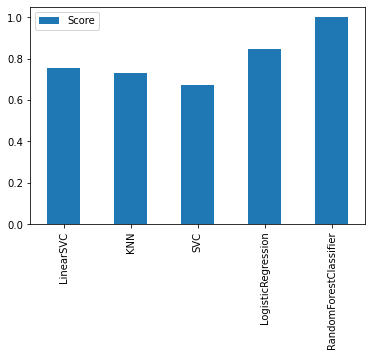

In [64]:
#create a pandas dataframe with the data as the values of the results dictionary,
#the index as the keys of the results dictionary and a single column called accuracy,
#be sure tosave the dataframe to a variable
results_df = pd.DataFrame(results.values(),
                          results.keys(),
                          columns=["Score"])
# create a bar plot of the results dataframe using plot.bar()
results_df.plot.bar()

In [65]:
#different LogisticRegression hyperparameters
log_reg_grid = {"C":np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
log_reg_grid


{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'solver': ['liblinear']}

In [66]:
#setup np random seed of 42
np.random.seed(42)

#import RandomizedSearchCV from sklearn's model_selection module
from sklearn.model_selection import RandomizedSearchCV

#setup on instance of RandomizedSearchCV with a LogisticRegression() estimator
#our log_reg_grid as the param_distributions, a cv of 5 and n_iter of 5
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=5,
                                verbose=0)

#fit the instance of RandomizedSearchCV
rs_log_reg.fit(X_train, y_train)

D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']})

In [67]:

#find the best parameters of the RandomizedSearchCV instance using the best_params_attribute
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [68]:
#score the instance of RandomizedSearchCV using the test data
rs_log_reg.score(X_test, y_test)

0.8571428571428571

In [69]:
#instantiate a logisticRegression classifier using thebesthyperparameters from RandomizedSearchCV 
clf = LogisticRegression(solver = 'liblinear', C = 0.23357214690901212)

#fit the new instance of LogisticRegression with the best hyperparameters on the training data
clf.fit(X_train, y_train)


D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [70]:
#import classification_report and confusion_matrix from sklearn's metrics module
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#import precision_score, recall_score and f1_score from sklearn's metrics module
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [71]:
#make predictions on test data and save them
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0], dtype=int64)

In [72]:
#create a confusion matrix using the confusion_matrix function
cf_matrix = confusion_matrix(y_test,y_preds)

<AxesSubplot:>

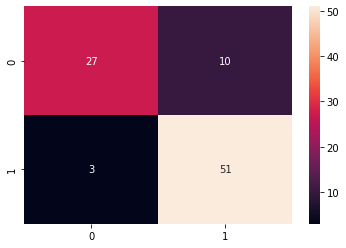

In [73]:
#create a more visual confusion matrix
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

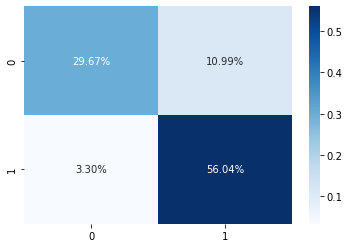

In [74]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

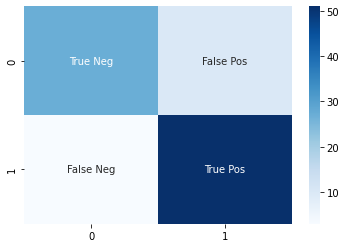

In [75]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

<AxesSubplot:>

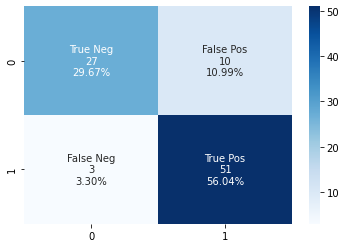

In [76]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [77]:
classification_report(y_test, y_preds)
classification_report
                      

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [78]:
#find the precision score of the model using precision_score()
precision_score(y_test, y_preds)

0.8360655737704918

In [79]:
#find the recall score
recall_score(y_test, y_preds)

0.9444444444444444

In [80]:
#find the f1 score
f1_score(y_test, y_preds)

0.8869565217391304

In [81]:
from sklearn import metrics

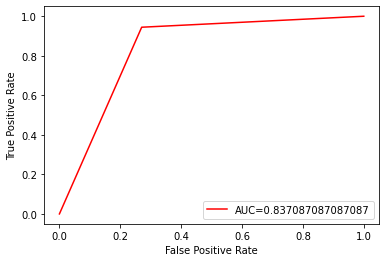

In [82]:
#plot a ROC curve using our current machine learning model 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_preds)
auc = metrics.roc_auc_score(y_test, y_preds)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc),color="red")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [83]:
#import cross_val_score from sklearn's model_selection module
from sklearn.model_selection import cross_val_score

In [84]:
#example:by default cross_val_score return 5 values
cross_val_score(clf,
               X,
               y,
               scoring="accuracy",
               cv=5)

D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [85]:
#example: taking the mean of the returned values from cross_val_score
#gives a cross-validated version of the scoring metric
cross_val_acc=np.mean(cross_val_score(clf,
                                     X,
                                     y,
                                     scoring="accuracy",
                                     cv=5))
cross_val_acc

D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

0.8479781420765027

In [86]:
#find the cross-valitated precision
cross_val_prec=np.mean(cross_val_score(clf,
                                     X,
                                     y,
                                     scoring="precision",
                                     cv=5))
cross_val_prec

D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

0.8215873015873015

In [87]:
#find the cross-valitated recall
cross_val_rec=np.mean(cross_val_score(clf,
                                     X,
                                     y,
                                     scoring="recall",
                                     cv=5))
cross_val_rec

D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

0.9272727272727274

In [88]:
#find the cross-valitated F1 score
cross_val_f1=np.mean(cross_val_score(clf,
                                     X,
                                     y,
                                     scoring="f1",
                                     cv=5))
cross_val_f1

D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

0.8705403543192143

In [89]:

import joblib

In [90]:
#import the dump and load functions from the joblib library
from joblib import dump, load

In [91]:
#use the dump function to export the trained model to file
filename = 'finalized_model.sav'
joblib.dump(clf, filename)

['finalized_model.sav']

In [92]:
#use the load function to import the trained model you just exported 
#save it to a different variable name to the original trained model
loaded_model = joblib.load(filename)

In [93]:
#evaluate the loaded trained model on the test data
result = loaded_model.score(X_test, y_test)
print(result)

0.8571428571428571


In [94]:
#read in the car sales data
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")

#view the first 5 rows of the car sales data
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [95]:
#get information about the car sales dataframe
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


# 1000 lignes
# object et float
# 49/50 valeurs

In [96]:
#find thenumber of missing values in each column
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [97]:
#find the datatypes of each column of car_sales
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [98]:
#Example: This doesn't work because our car_sales data isn't all numerical
from sklearn.ensemble import RandomForestRegressor
car_sales_X, car_sales_y = car_sales.drop("Price", axis=1), car_sales.Price
rf_regressor = RandomForestRegressor().fit(car_sales_X, car_sales_y)

ValueError: could not convert string to float: 'Honda'

In [99]:
#remove rows with np labels
car_sales1 = car_sales[car_sales['Price'].notna()]
car_sales1

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [100]:
#import Pipeline from sklearn's pipeline module
from sklearn.pipeline import Pipeline

#import ColumnTransformer from sklearn's compose module
from sklearn.compose import ColumnTransformer

#import SimpleImputer from sklearn's impute module
from sklearn.impute import SimpleImputer

#import OneHotEncoder from sklearn's preprocessing module
from sklearn.preprocessing import OneHotEncoder

#import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

In [101]:
#define different categorical features
categorical_features = ["Make", "Colour"]

#create categorical transformer Pipeline
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant",fill_value="missing")),
    
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [102]:
#define Doors features
door_features = ["Doors"]

#create Doors transformer Pipeline
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value= 4))
])

In [103]:
#define numeric features (only the Odometer (KM) column)
numeric_features = ["Odometer (KM)"]

#create numeric transformer Pipeline
numeric_transformer =Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median", fill_value= "missing"))
])

In [104]:
#setup preprocessing steps (fill missing values, then convert to numbers) 
preprocessor = ColumnTransformer(
       transformers=[
            ("cat", categorical_transformer,categorical_features),
            ("door",door_transformer,door_features),
            ("num",numeric_transformer, numeric_features  )
       ])

In [105]:
#import Ridge from sklearn's Linear_model module
from sklearn.linear_model import Ridge

#import SVR from sklearn's svm module
from sklearn.svm import SVR

#import RandomForestRegressor from sklearn's ensemble module
from sklearn.ensemble import RandomForestRegressor

In [106]:
#create dictionary of model instances, there should be 4 total key, value pairs
regression_models = {"Ridge":Ridge()  ,
                    "SVR_linear":SVR(),
                    "SVR_rbf":SVR(),
                    "RandomForestRegressor":RandomForestRegressor()}

#create an empty dictionary for the regression results
regression_results={}

In [107]:
#create car_sales_X data (every column of car_sales1 except Price)
car_sales_X= car_sales1.loc[:, car_sales1.columns != 'Price']
car_sales_X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [108]:
#create car_sales_y data (the Price column of car_sales)
car_sales_y = car_sales1[["Price"]]
car_sales_y

,Price
0,15323.0
1,19943.0
2,28343.0
3,13434.0
4,14043.0
...,...
995,32042.0
996,5716.0
997,31570.0
998,4001.0


In [109]:
#use train_test_split to split the car_sales_X and car_sales_y data into
#training and test sets
car_X_train, car_X_test, car_y_train, car_y_test = train_test_split(car_sales_X,
                                                                   car_sales_y,
                                                                   test_size=0.2 ,
                                                                    random_state=42
                                                                   
                                                                   )

In [110]:
#check the shapes of the training and test datasets
print(car_X_train.shape)
print(car_X_test.shape)
print(car_y_train.shape)
print(car_y_test.shape)

(760, 4)
(190, 4)
(760, 1)
(190, 1)


In [111]:
#loop through the items in the regression_models dictionary
for model_name, model in regression_models.items():
    model_pipeline = Pipeline(steps=[("preprocessor",preprocessor),
                                    ("model",model)])
    
    print(f"Fitting {model_name}...")
    model_pipeline.fit(car_X_train,car_y_train)
    
    print(f"Scoring {model_name}...")
    regression_results[model_name] =model_pipeline.score(car_X_test,car_y_test)

Fitting Ridge...
Scoring Ridge...
Fitting SVR_linear...
Scoring SVR_linear...
Fitting SVR_rbf...
Scoring SVR_rbf...


D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\download 01\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Fitting RandomForestRegressor...


D:\download 01\anaconda\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Scoring RandomForestRegressor...


In [112]:
print(regression_results)

{'Ridge': 0.25402611057943925, 'SVR_linear': 0.0018546241516633755, 'SVR_rbf': 0.0018546241516633755, 'RandomForestRegressor': 0.2291358152962253}


In [113]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [114]:
#create RidgeRegression Pipeline with preprocessor as the "preprocessor" and Ridge() as the "model"
ridge_pipeline = Pipeline(steps=[("preprocessor",preprocessor),
                        ("model", Ridge())])

#fit the RidgeRegression Pipeline to the car sales trainig data
ridge_pipeline.fit(car_X_train,car_y_train)

#make predictions on the car sales test data using the RidgeRegression Pipeline
car_y_preds = ridge_pipeline.predict(car_X_test)

#view
car_y_preds

array([[18514.480873  ],
       [22204.86580267],
       [11045.72092225],
       [ 6891.87687957],
       [ 8793.93970278],
       [10926.96786577],
       [15267.76229871],
       [13834.80312146],
       [20207.44377898],
       [14412.59968701],
       [ 6216.01228306],
       [16543.06707068],
       [11783.69374936],
       [13492.13284255],
       [14321.17899086],
       [16425.45131776],
       [15999.88230172],
       [ 9925.04252351],
       [11576.64865889],
       [11580.55130633],
       [10647.22402588],
       [13113.54464064],
       [17874.90033257],
       [23447.29246732],
       [11797.33019118],
       [14481.85336505],
       [18430.527126  ],
       [14680.33044208],
       [20585.63901269],
       [19953.91395769],
       [18163.1170151 ],
       [22366.43390174],
       [12435.69707467],
       [14265.25495748],
       [18351.62656383],
       [19564.58267503],
       [12213.05747919],
       [12479.20772529],
       [18677.93478691],
       [11284.89072638],


In [115]:
#example: find the mse by comparing the car sales test labels to the car sales predictions
mse= mean_squared_error(car_y_test, car_y_preds)
mse

49950182.633374564

In [116]:
#find the mae by comparing the car sales test labels to the car sales predictions
mae = mean_absolute_error(car_y_test, car_y_preds)
mae

5713.8215208551555

In [117]:
#find the r2 score by comparing the car sales test labels to the car sales predictions
r2 = r2_score(car_y_test, car_y_preds)
r2

0.25402611057943925

# FIN 